In [ ]:
#@title Visualização do Texto 
html = '<html>' \
'<head>' \
'Jordânia e Israel abrem passagem na fronteira' \
'<head>' \
'<body>' \
'Israel e Jordânia abriram ontem a ' \
'primeira passagem de fronteira entre os ' \
'dois países depois de 46 anos de estado ' \
'formal de guerra.' \
'</body>' \
'</html>'
print(html)

<html><head>Jordânia e Israel abrem passagem na fronteira<head><body>Israel e Jordânia abriram ontem a primeira passagem de fronteira entre os dois países depois de 46 anos de estado formal de guerra.</body></html>


In [ ]:
from bs4 import BeautifulSoup
bs = BeautifulSoup(html, 'html.parser')
texto = bs.get_text(separator=' ')
texto = texto.lower() #.upper() para ficar maisculo
texto

'jordânia e israel abrem passagem na fronteira israel e jordânia abriram ontem a primeira passagem de fronteira entre os dois países depois de 46 anos de estado formal de guerra.'

In [ ]:
import re
texto = re.sub(r'[^a-zá-ú\s]', '', texto)
texto

'jordânia e israel abrem passagem na fronteira israel e jordânia abriram ontem a primeira passagem de fronteira entre os dois países depois de  anos de estado formal de guerra'

In [ ]:
tokens = texto.split()
tokens

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords

In [ ]:
print('Antes: ', tokens)
tokens = [t for t in tokens if t not in stopwords]
print('Depois: ', tokens)

Antes:  ['jordânia', 'e', 'israel', 'abrem', 'passagem', 'na', 'fronteira', 'israel', 'e', 'jordânia', 'abriram', 'ontem', 'a', 'primeira', 'passagem', 'de', 'fronteira', 'entre', 'os', 'dois', 'países', 'depois', 'de', 'anos', 'de', 'estado', 'formal', 'de', 'guerra']
Depois:  ['jordânia', 'israel', 'abrem', 'passagem', 'fronteira', 'israel', 'jordânia', 'abriram', 'ontem', 'primeira', 'passagem', 'fronteira', 'dois', 'países', 'anos', 'estado', 'formal', 'guerra']


In [ ]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [ ]:
stemmer = nltk.stem.RSLPStemmer()

In [ ]:
stemmer.stem('abrir')

'abr'

In [ ]:
tokens_stem = [stemmer.stem(t) for t in tokens]
print(tokens_stem)

['jordân', 'israel', 'abr', 'pass', 'fronteir', 'israel', 'jordân', 'abr', 'ont', 'prim', 'pass', 'fronteir', 'doi', 'país', 'ano', 'est', 'formal', 'guerr']


In [ ]:
stemmer.stem('era')

'era'

In [ ]:
!pip install spacy

In [ ]:
import spacy.cli
spacy.cli.download("pt_core_news_sm")

✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')


In [ ]:
import spacy
lemat = spacy.load('pt_core_news_sm')
lemas = lemat(' '.join(tokens))
lemas = [l.lemma_ for l in lemas]
print(lemas)


['jordânia', 'israel', 'abrir', 'passagem', 'fronteiro', 'israel', 'jordânia', 'abrir', 'ontem', 'primeiro', 'passagem', 'fronteiro', 'dois', 'país', 'ano', 'estar', 'formal', 'guerra']


In [ ]:
from bs4 import BeautifulSoup
import nltk

html2 = '<html> <body> EUA e Japão se armam para guerra comercial </body> </html>'

texto2 = BeautifulSoup(html2, 'html.parser').get_text(separator=' ').lower()

tokens2 = texto2.split()

tokens2 = [t for t in tokens2 if t not in stopwords]

stemmer = nltk.stem.RSLPStemmer()
tokens2 = [stemmer.stem(t) for t in tokens2]

tokens2


['eua', 'jap', 'arm', 'guerr', 'comerc']

In [ ]:
html1 = '<html>' \
'<head>' \
'Jordânia e Israel abrem passagem na fronteira' \
'<head>' \
'<body>' \
'Israel e Jordânia abriram ontem a ' \
'primeira passagem de fronteira entre os ' \
'dois países depois de 46 anos de estado ' \
'formal de guerra.' \
'</body>' \
'</html>'
html2 = '<html>' \
'<body>' \
'EUA e Japão se armam para guerra comercial' \
'</body>'\
'</html>'

In [ ]:
from bs4 import BeautifulSoup
texto1 = BeautifulSoup(html1, 'html.parser').get_text(separator= ' ')
texto2 = BeautifulSoup(html2, 'html.parser').get_text(separator= ' ')

In [ ]:
print(texto1)
print(texto2)

Jordânia e Israel abrem passagem na fronteira Israel e Jordânia abriram ontem a primeira passagem de fronteira entre os dois países depois de 46 anos de estado formal de guerra.
EUA e Japão se armam para guerra comercial


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

vetor = vectorizer.fit_transform([texto1, texto2])

print('n:', len(vectorizer.get_feature_names()))
print(vectorizer.get_feature_names())
print(vetor.toarray())

n: 26
['46', 'abrem', 'abriram', 'anos', 'armam', 'comercial', 'de', 'depois', 'dois', 'entre', 'estado', 'eua', 'formal', 'fronteira', 'guerra', 'israel', 'japão', 'jordânia', 'na', 'ontem', 'os', 'para', 'passagem', 'países', 'primeira', 'se']
[[0.14663727 0.14663727 0.14663727 0.14663727 0.         0.
  0.58654908 0.14663727 0.14663727 0.14663727 0.14663727 0.
  0.14663727 0.29327454 0.10433363 0.29327454 0.         0.29327454
  0.14663727 0.14663727 0.14663727 0.         0.29327454 0.14663727
  0.14663727 0.        ]
 [0.         0.         0.         0.         0.39204401 0.39204401
  0.         0.         0.         0.         0.         0.39204401
  0.         0.         0.27894255 0.         0.39204401 0.
  0.         0.         0.         0.39204401 0.         0.
  0.         0.39204401]]


In [ ]:
# calcular tf
vectorizer = TfidfVectorizer(binary=False, norm='l1', use_idf=False)

vetor = vectorizer.fit_transform([texto1, texto2])
print(vetor.toarray())

[[0.03703704 0.03703704 0.03703704 0.03703704 0.         0.
  0.14814815 0.03703704 0.03703704 0.03703704 0.03703704 0.
  0.03703704 0.07407407 0.03703704 0.07407407 0.         0.07407407
  0.03703704 0.03703704 0.03703704 0.         0.07407407 0.03703704
  0.03703704 0.        ]
 [0.         0.         0.         0.         0.14285714 0.14285714
  0.         0.         0.         0.         0.         0.14285714
  0.         0.         0.14285714 0.         0.14285714 0.
  0.         0.         0.         0.14285714 0.         0.
  0.         0.14285714]]


In [ ]:
#calcular to
vectorizer = TfidfVectorizer(binary=False, norm=None, use_idf=False)

vetor = vectorizer.fit_transform([texto1, texto2])
print(vetor.toarray())

[[1. 1. 1. 1. 0. 0. 4. 1. 1. 1. 1. 0. 1. 2. 1. 2. 0. 2. 1. 1. 1. 0. 2. 1.
  1. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.
  0. 1.]]


In [ ]:
#calcular bo
vectorizer = TfidfVectorizer(binary=True, norm=None, use_idf=False)

vetor = vectorizer.fit_transform([texto1, texto2])
print(vetor.toarray())

[[1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
  1. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.
  0. 1.]]


In [ ]:
vectorizer = TfidfVectorizer(
    binary=False, 
    norm='l1', 
    use_idf=True, 
    token_pattern=r'\b[^\W\d]{3,}\b',
    stop_words=nltk.corpus.stopwords.words('portuguese')
    
)

vetor = vectorizer.fit_transform([texto1, texto2])
print(len(vectorizer.get_feature_names()))
print(vectorizer.get_feature_names())
print(vetor.toarray())

18
['abrem', 'abriram', 'anos', 'armam', 'comercial', 'dois', 'estado', 'eua', 'formal', 'fronteira', 'guerra', 'israel', 'japão', 'jordânia', 'ontem', 'passagem', 'países', 'primeira']
[[0.05646047 0.05646047 0.05646047 0.         0.         0.05646047
  0.05646047 0.         0.05646047 0.11292093 0.04017209 0.11292093
  0.         0.11292093 0.05646047 0.11292093 0.05646047 0.05646047]
 [0.         0.         0.         0.21224626 0.21224626 0.
  0.         0.21224626 0.         0.         0.15101496 0.
  0.21224626 0.         0.         0.         0.         0.        ]]


In [ ]:
#Metodo 01
stemmer = nltk.stem.RSLPStemmer()
nltk.download('punkt')
def stemmer_tokenizer(doc):
    tokens = nltk.word_tokenize(doc)
    tokens = [t for t in tokens if re.match(r'\b[^\W\d]{3,}\b', t)]
    tokens = [stemmer.stem(t) for t in tokens]
    return tokens

stopwords = [stemmer.stem(s) for s in nltk.corpus.stopwords.words('portuguese')]

vectorizer = TfidfVectorizer(
    binary=False, 
    norm='l1', 
    use_idf=True, 
    stop_words=stopwords,
    tokenizer=stemmer_tokenizer    
)

vetor = vectorizer.fit_transform([texto1, texto2])
print(len(vectorizer.get_feature_names()))
print(vectorizer.get_feature_names())
print(vetor.toarray())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
16
['abr', 'ano', 'arm', 'comerc', 'doi', 'eua', 'formal', 'fronteir', 'guerr', 'israel', 'jap', 'jordân', 'ont', 'pass', 'país', 'prim']
[[0.11967801 0.059839   0.         0.         0.059839   0.
  0.059839   0.11967801 0.04257594 0.11967801 0.         0.11967801
  0.059839   0.11967801 0.059839   0.059839  ]
 [0.         0.         0.21224626 0.21224626 0.         0.21224626
  0.         0.         0.15101496 0.         0.21224626 0.
  0.         0.         0.         0.        ]]


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['es', 'estivés', 'fos', 'fôs', 'houvés', 'is', 'nos', 'tivés'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
#Metodo 02
stemmer = nltk.stem.RSLPStemmer()
nltk.download('punkt')
def stemmer_tokenizer(doc):
    tokens = nltk.word_tokenize(doc)
    tokens = [t for t in tokens if re.match(r'\b[^\W\d]{3,}\b', t)]
    tokens = [stemmer.stem(t) for t in tokens]
    return tokens

def extract_text(doc):
    texto = BeautifulSoup(doc, 'html.parser').get_text(separator=' ')
    return texto

stopwords = [stemmer.stem(s) for s in nltk.corpus.stopwords.words('portuguese')]

vectorizer = TfidfVectorizer(
    binary=False, 
    norm='l1', 
    use_idf=True, 
    stop_words=stopwords,
    tokenizer=stemmer_tokenizer, 
    preprocessor=extract_text
)

vetor = vectorizer.fit_transform([html1, html2])
print(len(vectorizer.get_feature_names()))
print(vectorizer.get_feature_names())
print(vetor.toarray())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
16
['abr', 'ano', 'arm', 'comerc', 'doi', 'eua', 'formal', 'fronteir', 'guerr', 'israel', 'jap', 'jordân', 'ont', 'pass', 'país', 'prim']
[[0.11967801 0.059839   0.         0.         0.059839   0.
  0.059839   0.11967801 0.04257594 0.11967801 0.         0.11967801
  0.059839   0.11967801 0.059839   0.059839  ]
 [0.         0.         0.21224626 0.21224626 0.         0.21224626
  0.         0.         0.15101496 0.         0.21224626 0.
  0.         0.         0.         0.        ]]


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['es', 'estivés', 'fos', 'fôs', 'houvés', 'is', 'nos', 'tivés'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
#EXERCICIOS SUGESTÃO DE RESPOSTA

In [ ]:
avaliacoes = pd.read_excel('/content/drive/My Drive/Colab Notebooks/nlp/aula/data/kindle_review/reviews.xlsx')

In [ ]:
#@title Criar o vetor de características com `tokenizer` e stemmer { vertical-output: true }
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tf = TfidfVectorizer(
    binary=False,
    norm='l1', 
    use_idf=False, 
    stop_words=stopwords, 
    tokenizer=stemmer_tokenizer
)

vetor_tf = vectorizer_tf.fit_transform(avaliacoes.texto)

print('n:',len(vectorizer_tf.get_feature_names()))
#nomes das características
print(vectorizer_tf.get_feature_names())
# vetor de características
print(vetor_tf)

In [ ]:
#@title Palavra mais frequente { vertical-output: true }

#índice da palavra que mias ocorre
indice_maior = vetor_tf.argmax(1)[vetor_tf.max(1).argmax()].A[0][0]
# retornar palavra que mais ocorre a apartir do vetor
palavra_maior = vectorizer_tf.get_feature_names()[indice_maior]
print(palavra_maior)

In [ ]:






#AULA 04







In [ ]:
import nltk
import re
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')

stemmer = nltk.stem.RSLPStemmer()

def stemmer_tokenizer(doc):
  # considerar somente termos com letras e pelo menos 3 caracteres
    termos = [termo for termo in nltk.word_tokenize(doc) if re.match(r'^[^\W\d]{3,}$', termo)]    
    # aplicar stemmer
    termos = [stemmer.stem(termo) for termo in termos]
    return termos

# stopwords stemmer
stopwords = [stemmer.stem(s) for s in nltk.corpus.stopwords.words('portuguese')]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import pandas as pd
avaliacoes = pd.read_excel('/content/drive/MyDrive/MBA/Web Mining e Social Network Analysis/aula/data/kindle_review/reviews.xlsx')
#avaliacoes = avaliacoes[(avaliacoes.estrelas == 1) | (avaliacoes.estrelas == 2)]
avaliacoes

,Unnamed: 0,texto,estrelas,categoria
0,0,Não liga O produto veio com defeito e não ligo...,1,0
1,1,Péssima experiência Comprei o produto há cerca...,1,0
2,2,Nunca foi entregue Lamento informar que nunca ...,1,0
3,3,Kindle (cor preta) com tela sensível ao toque ...,1,0
4,4,"KINDLE Bom dia,por favor preciso de ajuda.Sext...",1,0
...,...,...,...,...
6921,6921,"Perfeito!!! Para quem gosta de ler, é a melhor...",5,1
6922,6922,"Boa qualidade, atende as necessidades. Adorei",5,1
6923,6923,. Ótimo,5,1
6924,6924,meu companheiro A melhor aquisição ja feita no...,5,1


In [ ]:
# colocar categorias em um vetor y
y = avaliacoes.categoria
y

0       0
1       0
2       0
3       0
4       0
       ..
6921    1
6922    1
6923    1
6924    1
6925    1
Name: categoria, Length: 6926, dtype: int64

In [ ]:
# criar vetor de caracteristica X com a contagem por tf.idf
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(binary=False, norm='l1', use_idf=True, stop_words=stopwords, tokenizer=stemmer_tokenizer)
X = vectorizer.fit_transform(avaliacoes.texto)
X

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['es', 'estivés', 'fos', 'fôs', 'houvés', 'is', 'nos', 'tivés'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


<6926x4778 sparse matrix of type '<class 'numpy.float64'>'
	with 121078 stored elements in Compressed Sparse Row format>

In [ ]:
# dividir em conjunto de treinamento
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88, stratify=y)
X_train.shape, X_test.shape

((4848, 4778), (2078, 4778))

In [ ]:
# criar e treinar modelo de árvore de decisão
from sklearn import tree
dtree = tree.DecisionTreeClassifier(random_state=88, criterion='entropy')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=88, splitter='best')

In [ ]:
  # aplicar o modelo no conjunto de testes 
  y_predict = dtree.predict(X_test)
  y_predict

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# avaliar acuracia do modelo 
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_test, y_predict)
acuracia

0.8541867179980751

In [ ]:
from sklearn import naive_bayes
bayes = naive_bayes.GaussianNB()
bayes.fit(X_train.toarray(), y_train)

y_predict = bayes.predict(X_test.toarray())
acuracia = accuracy_score(y_test, y_predict)
acuracia

0.528873917228104

In [ ]:
from sklearn.metrics import  confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[ 105,  147],
       [ 156, 1670]])

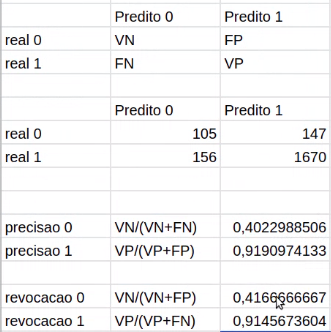

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
prf = precision_recall_fscore_support(y_test, y_predict)
prf

(array([0.40229885, 0.91909741]),
 array([0.41666667, 0.91456736]),
 array([0.40935673, 0.91682679]),
 array([ 252, 1826]))

In [ ]:
from sklearn.model_selection import train_test_split

dtree = tree.DecisionTreeClassifier(random_state=88, criterion='entropy')
acc_media = 0
for r in range(1, 11):  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=r, stratify=y)
    dtree = dtree.fit(X_train, y_train)
    y_predict = dtree.predict(X_test)
    acc = accuracy_score(y_test, y_predict)
    print(acc)
    acc_media += acc

print(acc_media/10)


0.8657362848893166
0.8792107795957652
0.8768046198267565
0.8666987487969201
0.8729547641963427
0.8806544754571703
0.8657362848893166
0.861405197305101
0.8642925890279115
0.870548604427334
0.8704042348411936


In [ ]:
from sklearn.model_selection import cross_val_predict

dtree = tree.DecisionTreeClassifier(random_state=88, criterion='entropy')
y_predict = cross_val_predict(dtree, X, y, cv=10)

prf = precision_recall_fscore_support(y, y_predict)
prf

(array([0.43316832, 0.92007192]),
 array([0.41716329, 0.92475768]),
 array([0.42501518, 0.92240885]),
 array([ 839, 6087]))